<a href="https://colab.research.google.com/github/AndresCesana/Antenas-y-Propagacion-de-Ondas/blob/main/TP1_antenas_y_propagaci%C3%B3n_de_ondas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Diagramas de radiación de un dipolo**

In [ ]:
#Materia: Antenas y propagación de ondas
#Alumno: Andrés Agustín Cesana
#Profesor: Amado José Luis

# **Ejecutar al iniciar solo una vez**

In [ ]:
import numpy as np #Para poder calcular coordenadas esféricas.
import matplotlib.pyplot as plt #Para graficar en 2D y 3D
from mpl_toolkits.mplot3d import Axes3D
!pip install plotly #Para gráficos en 3D mas interactivos
import plotly.graph_objects as go

# **Función para pedir la longitud del dipolo**

In [ ]:
def pedido_de_longitud():
    from fractions import Fraction

    while True:
        entrada = input("Ingresá una longitud (fracción tipo a/b o decimal): ")
        try:
            valor = float(entrada)
            break
        except ValueError:
            try:
                valor = float(Fraction(entrada))
                break
            except ValueError:
                print("Entrada no válida. Ingresá un número como 'a/b' o 'flotante'.")

    print("Valor ingresado:", valor)
    return valor


# **Función para calcular el patrón de radiación**

In [ ]:
def calculo_de_patron(Long, tita):
    beta = 2 * np.pi
    num = np.cos(beta * Long / 2 * np.cos(tita)) - np.cos(beta * Long / 2)
    denom = np.sin(tita)
    F = num / denom
    return F

# **Función Principal**

Ingresá una longitud (fracción tipo a/b o decimal): 4/3
Valor ingresado: 1.3333333333333333


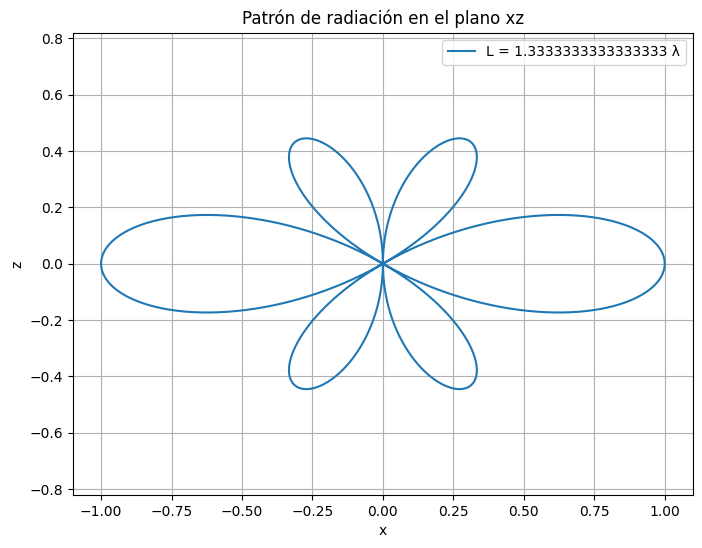

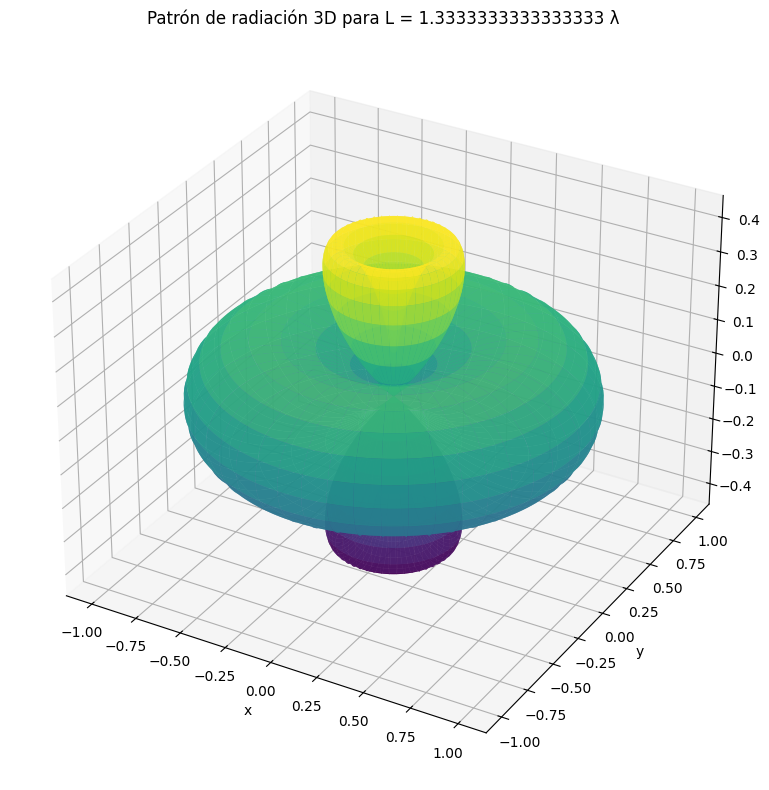

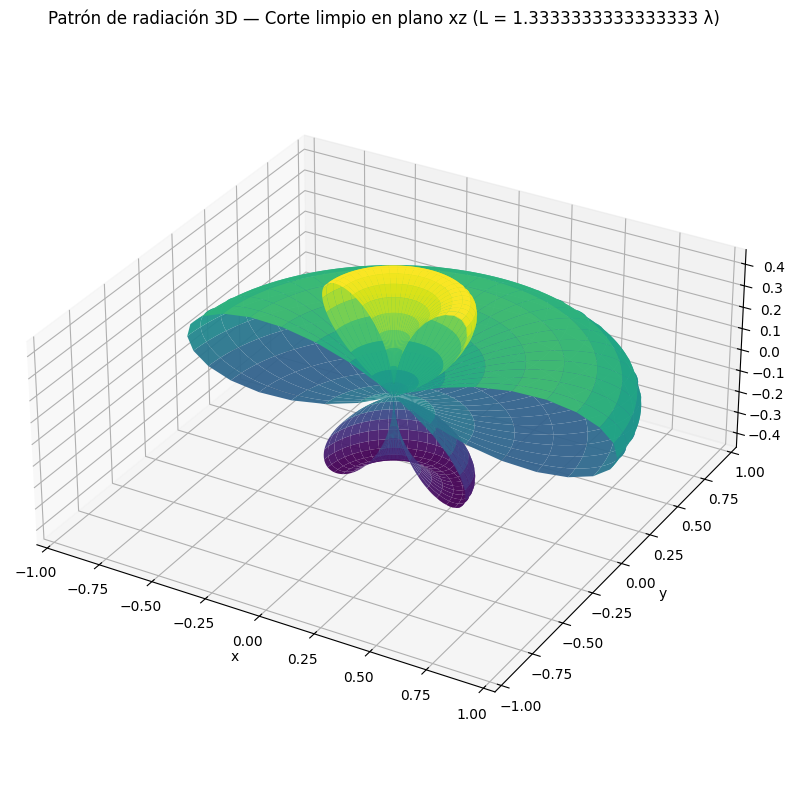

In [ ]:
# Código principal
L = pedido_de_longitud()

# GRÁFICO 2D en plano xz

theta_2d = np.linspace(1e-3, np.pi - 1e-3, 1000)
F_2d = calculo_de_patron(L, theta_2d)
F_2d_norm = F_2d / np.max(F_2d)

x_2d = F_2d_norm * np.sin(theta_2d)
z_2d = F_2d_norm * np.cos(theta_2d)

# Reflejo para simetría
x_total = np.concatenate([x_2d, -x_2d])
z_total = np.concatenate([z_2d, z_2d])

plt.figure(figsize=(8, 6))
plt.plot(x_total, z_total, label=f'L = {L} λ')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Patrón de radiación en el plano xz')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()

# GRÁFICO 3D en coordenadas esféricas

theta = np.linspace(1e-3, np.pi - 1e-3, 200)
phi = np.linspace(0, 2 * np.pi, 200)
theta, phi = np.meshgrid(theta, phi)

F_3d = calculo_de_patron(L, theta)
F_3d_norm = F_3d / np.max(F_3d)

x = F_3d_norm * np.sin(theta) * np.cos(phi)
y = F_3d_norm * np.sin(theta) * np.sin(phi)
z = F_3d_norm * np.cos(theta)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.8)

ax.set_title(f'Patrón de radiación 3D para L = {L} λ')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.tight_layout()
plt.show()
# GRÁFICO 3D CON CORTE — usando escalado real del patrón

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


mask = y > 0
x_cut = np.where(mask, x, np.nan)
y_cut = np.where(mask, y, np.nan)
z_cut = np.where(mask, z, np.nan)


ax.plot_surface(
    x_cut, y_cut, z_cut,
    cmap='viridis',
    edgecolor='none',
    alpha=0.95
)

# Calcular límites reales de los datos SIN recortar
lim_x = np.nanmax(np.abs(x))
lim_y = np.nanmax(np.abs(y))
lim_z = np.nanmax(np.abs(z))

# Aplicar límites con margen del 5%
ax.set_xlim([-lim_x * 1.05, lim_x * 1.05])
ax.set_ylim([-lim_y * 1.05, lim_y * 1.05])
ax.set_zlim([-lim_z * 1.05, lim_z * 1.05])

# Aspecto uniforme
ax.set_box_aspect([lim_x, lim_y, lim_z])

# Etiquetas
ax.set_title(f'Patrón de radiación 3D — Corte limpio en plano xz (L = {L} λ)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.tight_layout()
plt.show()


# **Código para comparar valores bajos de longitud**

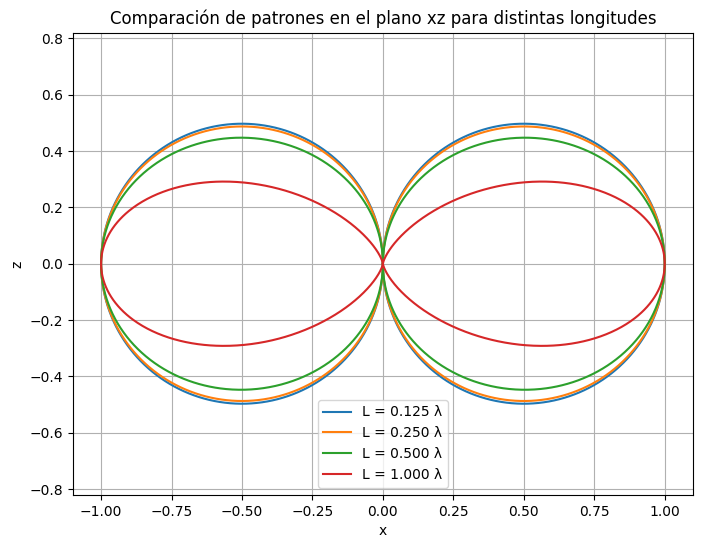

In [ ]:
longitudes = [1/8, 1/4, 1/2, 1]  # L en múltiplos de λ

plt.figure(figsize=(8, 6))

theta = np.linspace(1e-3, np.pi - 1e-3, 1000)

for L in longitudes:
    F = calculo_de_patron(L, theta)
    F_norm = F / np.max(F)  # o quitá esta línea para ver amplitud real
    x = F_norm * np.sin(theta)
    z = F_norm * np.cos(theta)
    x_total = np.concatenate([x, -x])
    z_total = np.concatenate([z, z])
    plt.plot(x_total, z_total, label=f'L = {L:.3f} λ')

plt.xlabel('x')
plt.ylabel('z')
plt.title('Comparación de patrones en el plano xz para distintas longitudes')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()


# **Código para comparar valores con lóbulos**

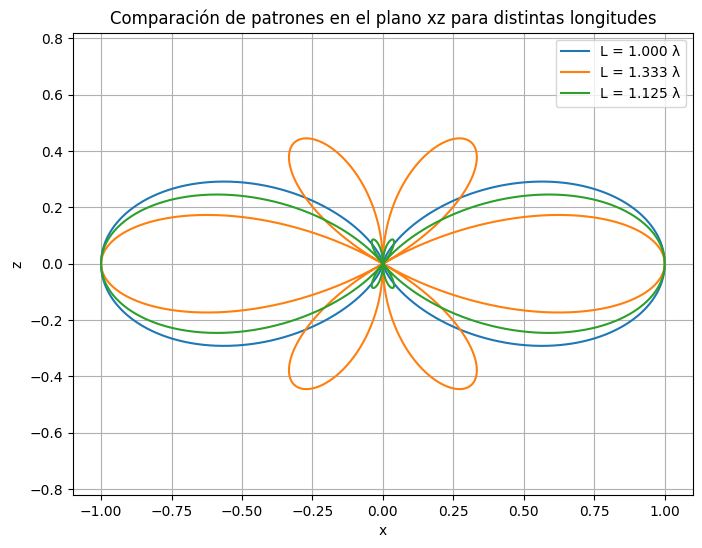

In [ ]:
longitudes = [1,4/3, 9/8]  # L en múltiplos de λ

plt.figure(figsize=(8, 6))

theta = np.linspace(1e-3, np.pi - 1e-3, 1000)

for L in longitudes:
    F = calculo_de_patron(L, theta)
    F_norm = F / np.max(F)  # o quitá esta línea para ver amplitud real
    x = F_norm * np.sin(theta)
    z = F_norm * np.cos(theta)
    x_total = np.concatenate([x, -x])
    z_total = np.concatenate([z, z])
    plt.plot(x_total, z_total, label=f'L = {L:.3f} λ')

plt.xlabel('x')
plt.ylabel('z')
plt.title('Comparación de patrones en el plano xz para distintas longitudes')
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()
